In [45]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [46]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# Classification number setting

In [47]:
NUM_CLASSES = 10

# Load learning data

In [48]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [49]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# model building

In [51]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [52]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_4 (Dropout)         (None, 42)                0         
                                                                 
 dense_6 (Dense)             (None, 20)                860       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
Total params: 1180 (4.61 KB)
Trainable params: 1180 (4.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# callback for early abort
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [54]:
# model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# model training

In [55]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


 1/14 [=>............................] - ETA: 5s - loss: 2.4132 - accuracy: 0.1406
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
14/14 [==============================] - 1s 12ms/step - loss: 2.3704 - accuracy: 0.1457 - val_loss: 2.2931 - val_accuracy: 0.1792
Epoch 2/1000
 1/14 [=>............................] - ETA: 0s - loss: 2.2843 - accuracy: 0.1641
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
14/14 [==============================] - 0s 3ms/step - loss: 2.2864 - accuracy: 0.1569 - val_loss: 2.2264 - val_accuracy: 0.1792
Epoch 3/1000
 1/14 [=>............................] - ETA: 0s - loss: 2.2364 - accuracy: 0.2109
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
14/14 [==============================] - 0s 3ms/step - loss: 2.2301 - accuracy: 0.1820 - val_loss: 2.1714 - val_accuracy: 0.1943
Epoch 4/1000
 1/14 [=>............................] - ETA: 0s - loss: 2.2339 - accuracy: 0.1953
Epoch 4: savi

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
14/14 [==============================] - 0s 3ms/step - loss: 2.0515 - accuracy: 0.2769 - val_loss: 1.9335 - val_accuracy: 0.3752
Epoch 7/1000
 1/14 [=>............................] - ETA: 0s - loss: 1.9695 - accuracy: 0.3438
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
14/14 [==============================] - 0s 3ms/step - loss: 1.9632 - accuracy: 0.3171 - val_loss: 1.8249 - val_accuracy: 0.3802
Epoch 8/1000
 1/14 [=>............................] - ETA: 0s - loss: 1.9840 - accuracy: 0.2812
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
14/14 [==============================] - 0s 3ms/step - loss: 1.8923 - accuracy: 0.3238 - val_loss: 1.7229 - val_accuracy: 0.3802
Epoch 9/1000
 1/14 [=>............................] - ETA: 0s - loss: 1.8873 - accuracy: 0.3359
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
14/14 [=============

In [56]:
# model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

5/5 [==============================] - 0s 1ms/step - loss: 0.1193 - accuracy: 0.9849


In [57]:
# Loading saved models
model = tf.keras.models.load_model(model_save_path)

In [58]:
# reasoning test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 39ms/step
[4.8214699e-22 1.6699861e-20 9.9996996e-01 2.9985224e-05 1.2885270e-09
 9.9468551e-16 3.2549352e-15 3.1945740e-15 3.4226695e-09 8.8435687e-10]
2


# mixed ranks

19/19 [==============================] - 0s 797us/step


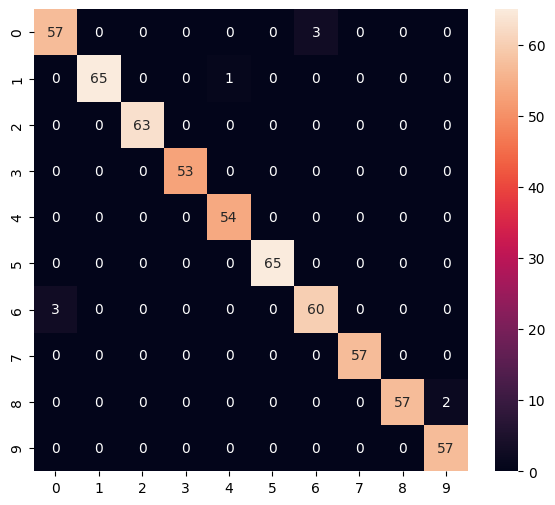

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        60
           1       1.00      0.98      0.99        66
           2       1.00      1.00      1.00        63
           3       1.00      1.00      1.00        53
           4       0.98      1.00      0.99        54
           5       1.00      1.00      1.00        65
           6       0.95      0.95      0.95        63
           7       1.00      1.00      1.00        57
           8       1.00      0.97      0.98        59
           9       0.97      1.00      0.98        57

    accuracy                           0.98       597
   macro avg       0.99      0.99      0.99       597
weighted avg       0.99      0.98      0.98       597



In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to tensorflowlite model

In [60]:
# Save as inference-only model
model.save(model_save_path, include_optimizer=False)

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [61]:
# Transform (quantize) the model
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/lt/3wr5lh054yn9t6xxwywt7j980000gn/T/tmphbv212cs/assets


INFO:tensorflow:Assets written to: /var/folders/lt/3wr5lh054yn9t6xxwywt7j980000gn/T/tmphbv212cs/assets
2023-07-25 22:39:24.913774: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-07-25 22:39:24.913795: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-07-25 22:39:24.914013: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/lt/3wr5lh054yn9t6xxwywt7j980000gn/T/tmphbv212cs
2023-07-25 22:39:24.915062: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-07-25 22:39:24.915072: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /var/folders/lt/3wr5lh054yn9t6xxwywt7j980000gn/T/tmphbv212cs
2023-07-25 22:39:24.918704: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-07-25 22:39:24.973150: I tensorflow/cc/saved_model/loader.cc:215] Running initialization

6836

# reasoning test

In [62]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [63]:
# get input/output tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [64]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [65]:
%%time
# Inference execution
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 88 µs, sys: 34 µs, total: 122 µs
Wall time: 111 µs


In [66]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.8214704e-22 1.6699736e-20 9.9996996e-01 2.9985165e-05 1.2885246e-09
 9.9468191e-16 3.2549109e-15 3.1945621e-15 3.4226630e-09 8.8435520e-10]
2
